In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

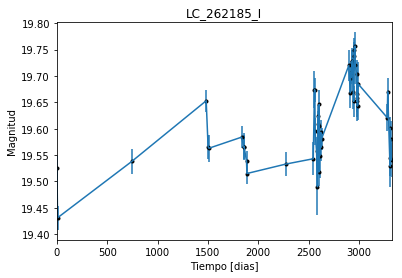

In [2]:
data = np.genfromtxt('LC_262185_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_262185_I')
plt.savefig("LC_262185_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

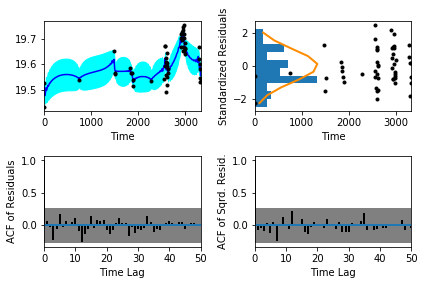

In [5]:
sample.assess_fit()

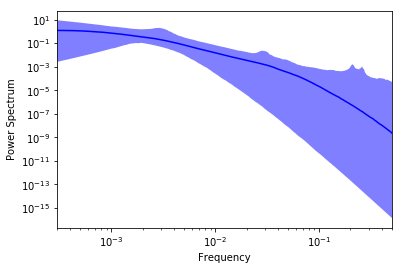

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

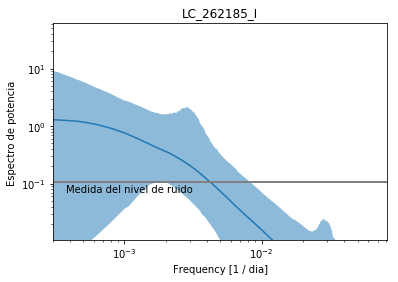

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_262185_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_262185_I')

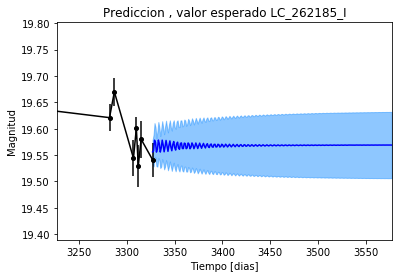

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_262185_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_262185_I')

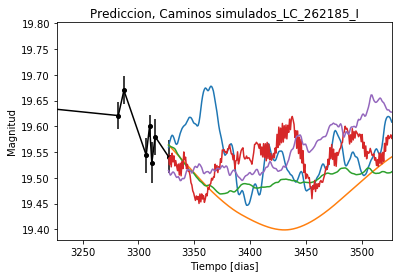

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_262185_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


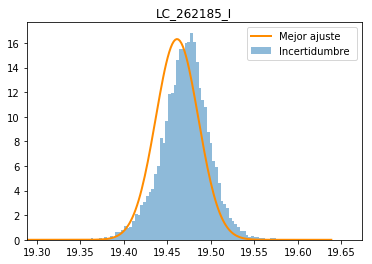

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_262185_I')
plt.savefig("Mejor_ajuste_LC_262185_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_262185_I')

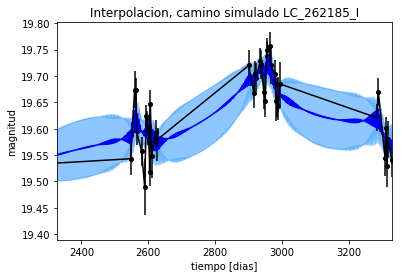

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_I')

Text(0.5,1,'Interpolacion, camino simulado LC_262185_I')

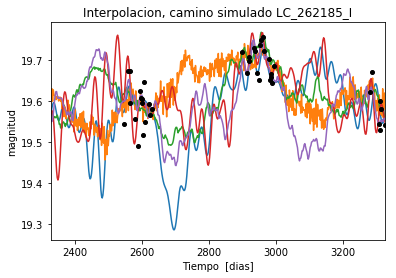

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_262185_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 450.40863244
Median: 0.0106914421682
Standard deviation: 0.186301828687
68% credibility interval: [ 0.00125096  0.15579032]
95% credibility interval: [  3.78954803e-04   7.49520439e-01]
99% credibility interval: [  3.18199318e-04   9.48181455e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 549.191348762
Median: 0.00495879676274
Standard deviation: 0.1062322812
68% credibility interval: [ 0.00083889  0.05137526]
95% credibility interval: [  3.51090017e-04   3.62159942e-01]
99% credibility interval: [  3.11725471e-04   7.49520439e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 443.009138519
Median: 0.0765394239005
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 958.276046026
Median: 103.800253519
Standard deviation: 1.90247115192
68% credibility interval: [ 101.86875855  105.3426171 ]
95% credibility interval: [  99.27170814  107.0035487 ]
99% credibility interval: [  97.29426217  107.94139942]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 737.015599459
Median: 1.19260594175
Standard deviation: 2.32738833365
68% credibility interval: [ 0.14212136  4.59683927]
95% credibility interval: [ 0.02255622  7.95275427]
99% credibility interval: [  0.0124987   10.94611605]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 655.71891178
Median: 1.78347383255
Standard deviation: 10.1877875455
68% credibility interval: [  0.0666138   13.93689113]
95% credibility interval: [  3.82566012e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1221.84340637
Median: 2.53381132187e-17
Standard deviation: 3.58965284019e+73
68% credibility interval: [  1.79049586e-41   1.92213815e+06]
95% credibility interval: [  3.17916690e-63   2.18623428e+60]
99% credibility interval: [  1.73216705e-72   4.17533162e+72]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1747.69188638
Median: 19.5765639276
Standard deviation: 0.0334931340864
68% credibility interval: [ 19.54515287  19.60467427]
95% credibility interval: [ 19.50343372  19.63642175]
99% credibility interval: [ 19.46786861  19.67178649]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 443.501420264
Median: 0.0964383478818
Standard deviation: 0.265298932168
68% credibility interval: [ 0.         0.5100621]
95% credibility interval: [ 0.          0.89893884]
99% credibility interval: [ 0.         0.9898383]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 443.501420264
Median: 0.0964383478818
Standard deviation: 0.265298932168
68% credibility interval: [ 0.         0.5100621]
95% credibility interval: [ 0.          0.89893884]
99% credibility interval: [ 0.         0.9898383]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 654.912580922
Median: 0.0
Standard deviation: 0.00107592983053
68% credibility

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 958.276046026
Median: 103.800253519
Standard deviation: 1.90247115192
68% credibility interval: [ 101.86875855  105.3426171 ]
95% credibility interval: [  99.27170814  107.0035487 ]
99% credibility interval: [  97.29426217  107.94139942]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2750.24406014
Median: 0.00616590050561
Standard deviation: 0.00505720431739
68% credibility interval: [ 0.00375063  0.01040154]
95% credibility interval: [ 0.0024371  0.0193765]
99% credibility interval: [ 0.00191006  0.0328353 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3170.80424812
Median: 1.26421674412
Standard deviation: 0.241202861149
68% credibility interval: [ 1.04669319  1.52943409]
95% credibility interval: [ 0.84949905  1.81569461]
99% credibility interval: [ 0.77382948  1.94908268]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 370.830584259
Median: 0.0010289194008
Standard deviation: 0.205176042837
68% credibility interval: [  2.23310654e-08   5.80264325e-02]
95% credibility interval: [  4.79582856e-64   5.96581059e-01]
99% credibility interval: [  1.44626339e-75   1.40870617e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 450.40863244
Median: (-0.067176312344-0.219977826316j)
Standard deviation: 2.03687547705
68% credibility interval: [-0.97885943+0.j         -0.00786001-0.01842186j]
95% credibility interval: [ -4.70937581e+00-1.99881161j  -2.38104325e-03-1.52817145j]
99% credibility interval: [ -5.95759979e+00+0.j          -1.99930528e-03-0.01906007j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 549.191348762
Median: (-0.031157038961+0.956088361436j)
Standard deviation: 1.79559344503
68% credibility interval: [-0.3228003+0.92097795j -0.0052709+0.j        ]
95% credibility interval: [ -2.27551802e+00+2.04637644j  -2.20596364e-03+0.0339442j ]
99% credibility interval: [ -4.70937581e+00+1.99881161j  -1.95862890e-03+4.97248357j]
Posteri